# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

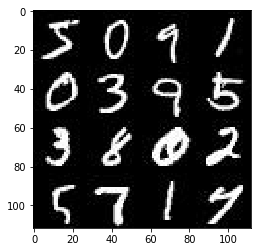

In [2]:
show_n_images = 23

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

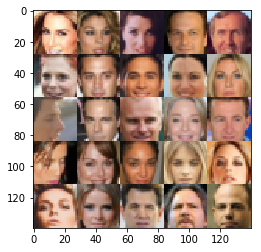

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0


f:\program files\python\python36\lib\site-packages\ipykernel\__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_inputs = tf.placeholder(tf.float32,(None,image_width, image_height, image_channels),name='real_inputs')
    z_inputs = tf.placeholder(tf.float32,(None,z_dim),name='z_inputs')
    learning_rate = tf.placeholder(tf.float32,name='learning_rate')
    
    return real_inputs, z_inputs, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    with tf.variable_scope("discriminator", reuse = reuse):
         
    
        x1 = tf.layers.conv2d(images, 128, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        relu1 = tf.maximum(0.2 * x1, x1)
    
    
        x2 = tf.layers.conv2d(relu1, 256, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(0.2 * bn2, bn2)
       
        
        x3 = tf.layers.conv2d(relu2, 512, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(0.2 * bn3, bn3)
        
        
        
        flat = tf.reshape(relu3, (-1, 4*4*512))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator',reuse = not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*512)
        
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(0.2 * x1, x1)
       
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(0.2 * x2, x2)
        
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(0.2 * x3, x3)
       
        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 3, strides=1, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        
        
        out = tf.tanh(logits)
        
  
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth = 0.1
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * (1 - smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]

    d_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    g_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate,beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    steps = 0
    _, image_width, image_height, image_channels = data_shape
    input_real, input_z, lr = model_inputs(image_width, image_height,image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z,image_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
        
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images = batch_images * 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, lr:learning_rate})
                
                if steps % 10 == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, 50, input_z, image_channels, data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.9296... Generator Loss: 1.5028
Epoch 1/2... Discriminator Loss: 0.5547... Generator Loss: 7.0089
Epoch 1/2... Discriminator Loss: 0.6385... Generator Loss: 3.4200
Epoch 1/2... Discriminator Loss: 1.6165... Generator Loss: 3.1987
Epoch 1/2... Discriminator Loss: 1.9904... Generator Loss: 0.6369
Epoch 1/2... Discriminator Loss: 1.4237... Generator Loss: 1.3024
Epoch 1/2... Discriminator Loss: 3.2435... Generator Loss: 0.0877
Epoch 1/2... Discriminator Loss: 1.3414... Generator Loss: 0.8977
Epoch 1/2... Discriminator Loss: 1.7314... Generator Loss: 1.7324
Epoch 1/2... Discriminator Loss: 1.7754... Generator Loss: 0.3895


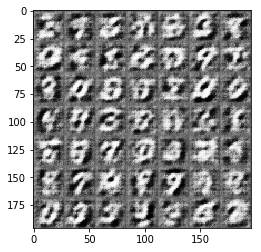

Epoch 1/2... Discriminator Loss: 1.6283... Generator Loss: 0.8693
Epoch 1/2... Discriminator Loss: 1.5710... Generator Loss: 1.6706
Epoch 1/2... Discriminator Loss: 1.4132... Generator Loss: 0.7775
Epoch 1/2... Discriminator Loss: 1.5616... Generator Loss: 0.7315
Epoch 1/2... Discriminator Loss: 1.5737... Generator Loss: 1.6870
Epoch 1/2... Discriminator Loss: 1.1452... Generator Loss: 1.0270
Epoch 1/2... Discriminator Loss: 1.8684... Generator Loss: 0.2932
Epoch 1/2... Discriminator Loss: 1.3545... Generator Loss: 0.8099
Epoch 1/2... Discriminator Loss: 1.3463... Generator Loss: 1.7881
Epoch 1/2... Discriminator Loss: 1.5737... Generator Loss: 0.4752


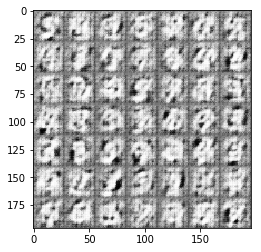

Epoch 1/2... Discriminator Loss: 1.4664... Generator Loss: 0.5938
Epoch 1/2... Discriminator Loss: 1.1428... Generator Loss: 2.1383
Epoch 1/2... Discriminator Loss: 1.0852... Generator Loss: 0.8229
Epoch 1/2... Discriminator Loss: 1.6291... Generator Loss: 0.3637
Epoch 1/2... Discriminator Loss: 1.0930... Generator Loss: 1.0088
Epoch 1/2... Discriminator Loss: 0.7814... Generator Loss: 1.5933
Epoch 1/2... Discriminator Loss: 1.0008... Generator Loss: 1.1965
Epoch 1/2... Discriminator Loss: 1.4019... Generator Loss: 0.5626
Epoch 1/2... Discriminator Loss: 1.0567... Generator Loss: 1.7528
Epoch 1/2... Discriminator Loss: 1.5152... Generator Loss: 0.5459


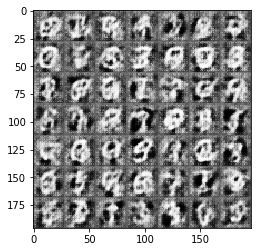

Epoch 1/2... Discriminator Loss: 1.0104... Generator Loss: 0.9346
Epoch 1/2... Discriminator Loss: 1.2418... Generator Loss: 2.0467
Epoch 1/2... Discriminator Loss: 1.1636... Generator Loss: 0.9487
Epoch 1/2... Discriminator Loss: 1.2973... Generator Loss: 0.6423
Epoch 1/2... Discriminator Loss: 0.9481... Generator Loss: 1.2498
Epoch 1/2... Discriminator Loss: 1.4945... Generator Loss: 0.5104
Epoch 1/2... Discriminator Loss: 1.4692... Generator Loss: 0.4984
Epoch 1/2... Discriminator Loss: 1.3671... Generator Loss: 0.5142
Epoch 1/2... Discriminator Loss: 0.9001... Generator Loss: 1.0473
Epoch 1/2... Discriminator Loss: 1.9660... Generator Loss: 0.2794


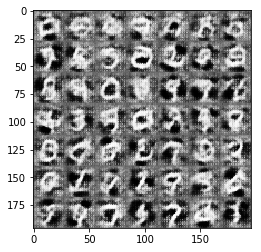

Epoch 1/2... Discriminator Loss: 1.4755... Generator Loss: 0.6693
Epoch 1/2... Discriminator Loss: 0.9792... Generator Loss: 1.1750
Epoch 1/2... Discriminator Loss: 1.2266... Generator Loss: 1.0617
Epoch 1/2... Discriminator Loss: 1.3226... Generator Loss: 1.1729
Epoch 1/2... Discriminator Loss: 1.0903... Generator Loss: 1.3228
Epoch 1/2... Discriminator Loss: 1.1073... Generator Loss: 1.2430
Epoch 1/2... Discriminator Loss: 1.4655... Generator Loss: 0.4979
Epoch 1/2... Discriminator Loss: 1.1947... Generator Loss: 1.0199
Epoch 1/2... Discriminator Loss: 1.3228... Generator Loss: 0.5997
Epoch 1/2... Discriminator Loss: 1.1031... Generator Loss: 0.8238


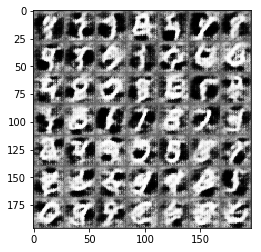

Epoch 1/2... Discriminator Loss: 1.4459... Generator Loss: 0.4885
Epoch 1/2... Discriminator Loss: 1.6685... Generator Loss: 0.3871
Epoch 1/2... Discriminator Loss: 1.2252... Generator Loss: 0.6350
Epoch 1/2... Discriminator Loss: 1.1663... Generator Loss: 1.2612
Epoch 1/2... Discriminator Loss: 1.0950... Generator Loss: 1.3948
Epoch 1/2... Discriminator Loss: 1.2330... Generator Loss: 1.4990
Epoch 1/2... Discriminator Loss: 1.1726... Generator Loss: 0.8074
Epoch 1/2... Discriminator Loss: 1.2516... Generator Loss: 0.8930
Epoch 1/2... Discriminator Loss: 0.9707... Generator Loss: 1.3727
Epoch 1/2... Discriminator Loss: 1.5944... Generator Loss: 0.4080


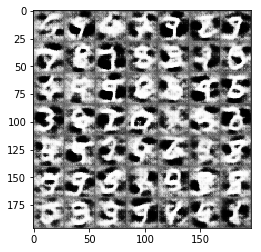

Epoch 1/2... Discriminator Loss: 1.2794... Generator Loss: 1.0358
Epoch 1/2... Discriminator Loss: 1.0578... Generator Loss: 1.2412
Epoch 1/2... Discriminator Loss: 1.4011... Generator Loss: 0.5420
Epoch 1/2... Discriminator Loss: 0.9943... Generator Loss: 1.1124
Epoch 1/2... Discriminator Loss: 1.6045... Generator Loss: 0.4036
Epoch 1/2... Discriminator Loss: 1.0731... Generator Loss: 0.8756
Epoch 1/2... Discriminator Loss: 1.7228... Generator Loss: 2.4387
Epoch 1/2... Discriminator Loss: 1.0064... Generator Loss: 1.0885
Epoch 1/2... Discriminator Loss: 1.2335... Generator Loss: 0.7423
Epoch 1/2... Discriminator Loss: 1.1357... Generator Loss: 0.7509


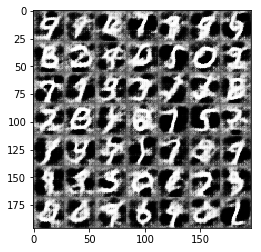

Epoch 1/2... Discriminator Loss: 1.5300... Generator Loss: 0.4498
Epoch 1/2... Discriminator Loss: 2.1666... Generator Loss: 0.2429
Epoch 1/2... Discriminator Loss: 1.1412... Generator Loss: 0.8645
Epoch 1/2... Discriminator Loss: 1.1664... Generator Loss: 0.7763
Epoch 1/2... Discriminator Loss: 1.2980... Generator Loss: 2.4030
Epoch 1/2... Discriminator Loss: 0.8850... Generator Loss: 1.9394
Epoch 1/2... Discriminator Loss: 1.1933... Generator Loss: 0.9096
Epoch 1/2... Discriminator Loss: 1.3094... Generator Loss: 1.7366
Epoch 1/2... Discriminator Loss: 1.3559... Generator Loss: 0.6795
Epoch 1/2... Discriminator Loss: 1.2916... Generator Loss: 0.7297


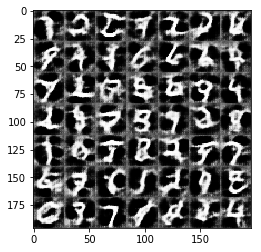

Epoch 1/2... Discriminator Loss: 0.8991... Generator Loss: 1.2764
Epoch 1/2... Discriminator Loss: 1.2009... Generator Loss: 0.9875
Epoch 1/2... Discriminator Loss: 1.1414... Generator Loss: 0.7938
Epoch 1/2... Discriminator Loss: 1.1482... Generator Loss: 2.0806
Epoch 1/2... Discriminator Loss: 1.1136... Generator Loss: 0.7513
Epoch 1/2... Discriminator Loss: 1.3003... Generator Loss: 0.6697
Epoch 1/2... Discriminator Loss: 1.1144... Generator Loss: 0.9443
Epoch 1/2... Discriminator Loss: 1.1151... Generator Loss: 0.8369
Epoch 1/2... Discriminator Loss: 1.3779... Generator Loss: 0.5589
Epoch 1/2... Discriminator Loss: 1.1702... Generator Loss: 0.7586


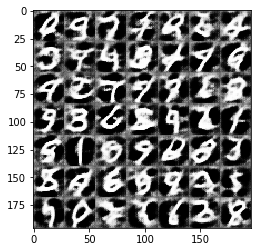

Epoch 1/2... Discriminator Loss: 0.9328... Generator Loss: 1.3464
Epoch 1/2... Discriminator Loss: 1.0086... Generator Loss: 1.1534
Epoch 1/2... Discriminator Loss: 1.2610... Generator Loss: 0.6653
Epoch 1/2... Discriminator Loss: 1.2906... Generator Loss: 0.7103
Epoch 1/2... Discriminator Loss: 1.0915... Generator Loss: 0.9397
Epoch 1/2... Discriminator Loss: 1.1518... Generator Loss: 1.2452
Epoch 1/2... Discriminator Loss: 0.9996... Generator Loss: 1.0029
Epoch 1/2... Discriminator Loss: 1.7128... Generator Loss: 2.8566
Epoch 1/2... Discriminator Loss: 1.1007... Generator Loss: 0.7815
Epoch 1/2... Discriminator Loss: 1.5998... Generator Loss: 0.4263


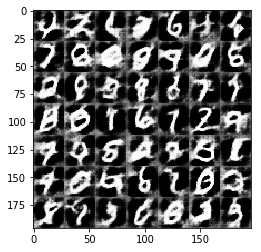

Epoch 1/2... Discriminator Loss: 1.1316... Generator Loss: 1.9303
Epoch 1/2... Discriminator Loss: 1.1492... Generator Loss: 1.3780
Epoch 1/2... Discriminator Loss: 1.2661... Generator Loss: 0.5943
Epoch 1/2... Discriminator Loss: 1.0334... Generator Loss: 1.4997
Epoch 1/2... Discriminator Loss: 0.8280... Generator Loss: 1.2765
Epoch 1/2... Discriminator Loss: 1.0886... Generator Loss: 0.8127
Epoch 1/2... Discriminator Loss: 1.0179... Generator Loss: 0.9297
Epoch 1/2... Discriminator Loss: 1.0724... Generator Loss: 0.8313
Epoch 1/2... Discriminator Loss: 0.8612... Generator Loss: 1.1984
Epoch 1/2... Discriminator Loss: 1.8682... Generator Loss: 0.3169


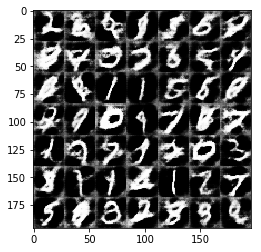

Epoch 1/2... Discriminator Loss: 5.4163... Generator Loss: 0.0164
Epoch 1/2... Discriminator Loss: 1.0406... Generator Loss: 0.8525
Epoch 1/2... Discriminator Loss: 1.1734... Generator Loss: 0.8079
Epoch 1/2... Discriminator Loss: 1.2177... Generator Loss: 0.7002
Epoch 1/2... Discriminator Loss: 1.3621... Generator Loss: 0.9131
Epoch 1/2... Discriminator Loss: 1.0705... Generator Loss: 1.3544
Epoch 1/2... Discriminator Loss: 0.9818... Generator Loss: 1.0626
Epoch 1/2... Discriminator Loss: 1.2909... Generator Loss: 0.6347
Epoch 1/2... Discriminator Loss: 1.0394... Generator Loss: 0.9064
Epoch 1/2... Discriminator Loss: 0.7934... Generator Loss: 1.6235


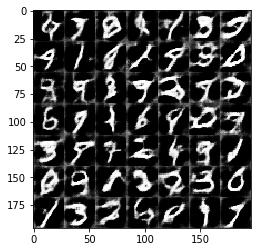

Epoch 1/2... Discriminator Loss: 0.9693... Generator Loss: 1.0766
Epoch 1/2... Discriminator Loss: 1.2365... Generator Loss: 1.0902
Epoch 1/2... Discriminator Loss: 1.2427... Generator Loss: 0.6189
Epoch 1/2... Discriminator Loss: 0.9284... Generator Loss: 1.3070
Epoch 1/2... Discriminator Loss: 0.9583... Generator Loss: 1.1457
Epoch 1/2... Discriminator Loss: 1.0500... Generator Loss: 0.8899
Epoch 1/2... Discriminator Loss: 1.0986... Generator Loss: 0.7622
Epoch 1/2... Discriminator Loss: 0.8788... Generator Loss: 1.3245
Epoch 1/2... Discriminator Loss: 1.1522... Generator Loss: 0.9951
Epoch 1/2... Discriminator Loss: 1.4763... Generator Loss: 0.5336


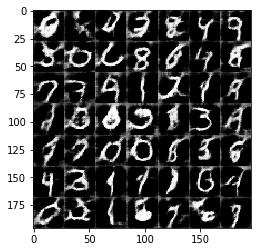

Epoch 1/2... Discriminator Loss: 0.7885... Generator Loss: 1.4174
Epoch 1/2... Discriminator Loss: 1.3073... Generator Loss: 0.5732
Epoch 1/2... Discriminator Loss: 1.4784... Generator Loss: 0.5192
Epoch 1/2... Discriminator Loss: 1.2746... Generator Loss: 0.6084
Epoch 1/2... Discriminator Loss: 1.0023... Generator Loss: 0.9229
Epoch 1/2... Discriminator Loss: 1.8529... Generator Loss: 0.3416
Epoch 1/2... Discriminator Loss: 1.0306... Generator Loss: 0.9577
Epoch 1/2... Discriminator Loss: 0.7891... Generator Loss: 1.5401
Epoch 1/2... Discriminator Loss: 0.8144... Generator Loss: 1.3393
Epoch 1/2... Discriminator Loss: 1.9932... Generator Loss: 0.3094


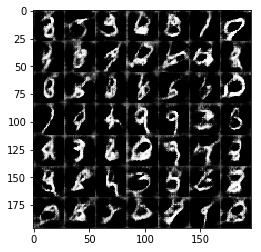

Epoch 1/2... Discriminator Loss: 1.0532... Generator Loss: 1.6967
Epoch 1/2... Discriminator Loss: 0.9635... Generator Loss: 1.1870
Epoch 1/2... Discriminator Loss: 1.2878... Generator Loss: 2.0775
Epoch 1/2... Discriminator Loss: 1.1254... Generator Loss: 0.7847
Epoch 1/2... Discriminator Loss: 0.8505... Generator Loss: 1.2558
Epoch 1/2... Discriminator Loss: 1.0588... Generator Loss: 0.8130
Epoch 1/2... Discriminator Loss: 1.7669... Generator Loss: 0.3833
Epoch 1/2... Discriminator Loss: 0.8096... Generator Loss: 1.2255
Epoch 1/2... Discriminator Loss: 1.3207... Generator Loss: 1.6945
Epoch 1/2... Discriminator Loss: 0.9362... Generator Loss: 1.0304


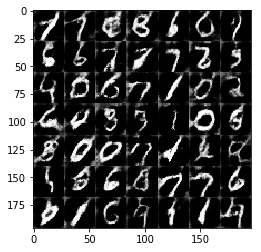

Epoch 1/2... Discriminator Loss: 1.5556... Generator Loss: 0.4607
Epoch 1/2... Discriminator Loss: 1.3002... Generator Loss: 0.5991
Epoch 1/2... Discriminator Loss: 1.5129... Generator Loss: 0.5451
Epoch 1/2... Discriminator Loss: 0.8250... Generator Loss: 1.2076
Epoch 1/2... Discriminator Loss: 1.1215... Generator Loss: 0.8221
Epoch 1/2... Discriminator Loss: 0.9847... Generator Loss: 1.2909
Epoch 1/2... Discriminator Loss: 1.0641... Generator Loss: 2.1393
Epoch 1/2... Discriminator Loss: 0.8672... Generator Loss: 1.2562
Epoch 1/2... Discriminator Loss: 0.9482... Generator Loss: 2.2687
Epoch 1/2... Discriminator Loss: 0.9545... Generator Loss: 1.0030


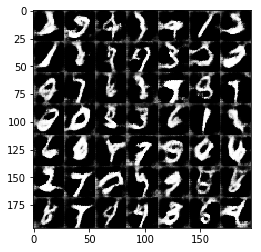

Epoch 1/2... Discriminator Loss: 1.6130... Generator Loss: 0.3978
Epoch 1/2... Discriminator Loss: 1.0139... Generator Loss: 0.8463
Epoch 1/2... Discriminator Loss: 0.8329... Generator Loss: 1.4207
Epoch 1/2... Discriminator Loss: 1.4308... Generator Loss: 0.5508
Epoch 1/2... Discriminator Loss: 0.8348... Generator Loss: 2.0215
Epoch 1/2... Discriminator Loss: 1.7290... Generator Loss: 0.4057
Epoch 1/2... Discriminator Loss: 1.3670... Generator Loss: 0.5781
Epoch 1/2... Discriminator Loss: 0.7478... Generator Loss: 1.5181
Epoch 1/2... Discriminator Loss: 0.9207... Generator Loss: 1.2243
Epoch 1/2... Discriminator Loss: 0.8863... Generator Loss: 1.1554


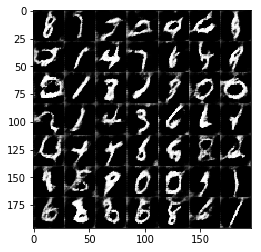

Epoch 1/2... Discriminator Loss: 0.8514... Generator Loss: 1.1665
Epoch 1/2... Discriminator Loss: 0.6976... Generator Loss: 1.7149
Epoch 1/2... Discriminator Loss: 1.0644... Generator Loss: 1.4534
Epoch 1/2... Discriminator Loss: 1.2291... Generator Loss: 0.7882
Epoch 1/2... Discriminator Loss: 1.2271... Generator Loss: 0.7331
Epoch 1/2... Discriminator Loss: 1.2414... Generator Loss: 0.6499
Epoch 1/2... Discriminator Loss: 1.0771... Generator Loss: 1.0163
Epoch 1/2... Discriminator Loss: 1.2249... Generator Loss: 1.5383
Epoch 1/2... Discriminator Loss: 0.9242... Generator Loss: 1.2044
Epoch 1/2... Discriminator Loss: 0.7442... Generator Loss: 1.6660


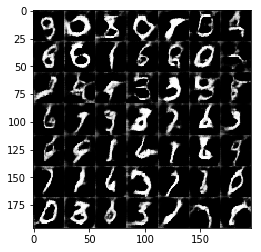

Epoch 1/2... Discriminator Loss: 1.0695... Generator Loss: 1.4966
Epoch 1/2... Discriminator Loss: 1.0768... Generator Loss: 0.7908
Epoch 1/2... Discriminator Loss: 1.2028... Generator Loss: 1.2402
Epoch 1/2... Discriminator Loss: 1.4524... Generator Loss: 0.4878
Epoch 1/2... Discriminator Loss: 1.1543... Generator Loss: 0.8610
Epoch 1/2... Discriminator Loss: 1.0895... Generator Loss: 0.7926
Epoch 1/2... Discriminator Loss: 1.0047... Generator Loss: 0.8810
Epoch 2/2... Discriminator Loss: 0.8593... Generator Loss: 1.7447
Epoch 2/2... Discriminator Loss: 1.1166... Generator Loss: 0.8991
Epoch 2/2... Discriminator Loss: 0.8866... Generator Loss: 1.2089


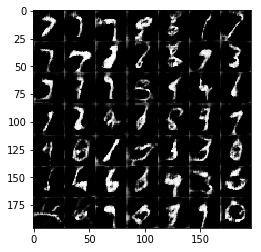

Epoch 2/2... Discriminator Loss: 0.9981... Generator Loss: 1.1897
Epoch 2/2... Discriminator Loss: 1.1295... Generator Loss: 0.7675
Epoch 2/2... Discriminator Loss: 1.3597... Generator Loss: 0.6177
Epoch 2/2... Discriminator Loss: 0.8979... Generator Loss: 1.1575
Epoch 2/2... Discriminator Loss: 1.0981... Generator Loss: 2.3143
Epoch 2/2... Discriminator Loss: 1.4580... Generator Loss: 0.5039
Epoch 2/2... Discriminator Loss: 1.2495... Generator Loss: 0.6302
Epoch 2/2... Discriminator Loss: 1.1864... Generator Loss: 0.7081
Epoch 2/2... Discriminator Loss: 0.7356... Generator Loss: 1.5565
Epoch 2/2... Discriminator Loss: 0.8853... Generator Loss: 1.2066


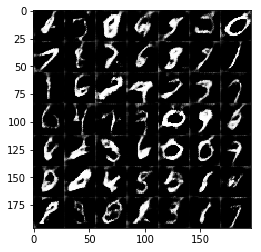

Epoch 2/2... Discriminator Loss: 1.1196... Generator Loss: 2.3561
Epoch 2/2... Discriminator Loss: 1.4045... Generator Loss: 0.5780
Epoch 2/2... Discriminator Loss: 1.3792... Generator Loss: 0.5607
Epoch 2/2... Discriminator Loss: 0.8105... Generator Loss: 1.2246
Epoch 2/2... Discriminator Loss: 0.8144... Generator Loss: 1.3069
Epoch 2/2... Discriminator Loss: 0.7475... Generator Loss: 1.5480
Epoch 2/2... Discriminator Loss: 0.8633... Generator Loss: 1.4975
Epoch 2/2... Discriminator Loss: 1.2609... Generator Loss: 0.6545
Epoch 2/2... Discriminator Loss: 1.0717... Generator Loss: 1.0411
Epoch 2/2... Discriminator Loss: 0.9768... Generator Loss: 1.0596


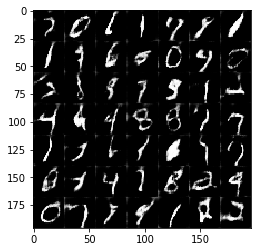

Epoch 2/2... Discriminator Loss: 0.8444... Generator Loss: 1.3294
Epoch 2/2... Discriminator Loss: 0.9436... Generator Loss: 1.5640
Epoch 2/2... Discriminator Loss: 0.9940... Generator Loss: 0.9538
Epoch 2/2... Discriminator Loss: 0.9834... Generator Loss: 1.8528
Epoch 2/2... Discriminator Loss: 1.0772... Generator Loss: 0.7937
Epoch 2/2... Discriminator Loss: 0.8987... Generator Loss: 1.0782
Epoch 2/2... Discriminator Loss: 1.5300... Generator Loss: 0.5513
Epoch 2/2... Discriminator Loss: 1.0335... Generator Loss: 0.9599
Epoch 2/2... Discriminator Loss: 0.6568... Generator Loss: 1.6207
Epoch 2/2... Discriminator Loss: 0.8073... Generator Loss: 1.4013


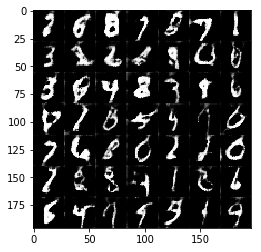

Epoch 2/2... Discriminator Loss: 0.9212... Generator Loss: 1.0807
Epoch 2/2... Discriminator Loss: 0.6352... Generator Loss: 1.7218
Epoch 2/2... Discriminator Loss: 0.8194... Generator Loss: 1.4739
Epoch 2/2... Discriminator Loss: 0.6267... Generator Loss: 1.5975
Epoch 2/2... Discriminator Loss: 1.4299... Generator Loss: 0.5600
Epoch 2/2... Discriminator Loss: 1.1613... Generator Loss: 2.6020
Epoch 2/2... Discriminator Loss: 0.7635... Generator Loss: 2.3164
Epoch 2/2... Discriminator Loss: 1.0966... Generator Loss: 0.8174
Epoch 2/2... Discriminator Loss: 1.2297... Generator Loss: 0.7751
Epoch 2/2... Discriminator Loss: 0.8999... Generator Loss: 1.6222


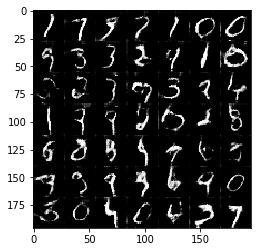

Epoch 2/2... Discriminator Loss: 0.7408... Generator Loss: 1.6161
Epoch 2/2... Discriminator Loss: 1.2105... Generator Loss: 0.7103
Epoch 2/2... Discriminator Loss: 0.8675... Generator Loss: 1.7112
Epoch 2/2... Discriminator Loss: 1.0460... Generator Loss: 0.9128
Epoch 2/2... Discriminator Loss: 0.7467... Generator Loss: 1.4866
Epoch 2/2... Discriminator Loss: 0.9198... Generator Loss: 1.1016
Epoch 2/2... Discriminator Loss: 0.7964... Generator Loss: 1.4345
Epoch 2/2... Discriminator Loss: 0.7999... Generator Loss: 1.6500
Epoch 2/2... Discriminator Loss: 1.0544... Generator Loss: 0.9651
Epoch 2/2... Discriminator Loss: 0.8815... Generator Loss: 2.1823


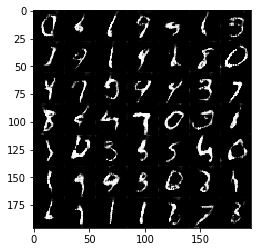

Epoch 2/2... Discriminator Loss: 0.9783... Generator Loss: 0.9874
Epoch 2/2... Discriminator Loss: 0.8553... Generator Loss: 1.4482
Epoch 2/2... Discriminator Loss: 1.0635... Generator Loss: 0.8977
Epoch 2/2... Discriminator Loss: 0.9523... Generator Loss: 1.1556
Epoch 2/2... Discriminator Loss: 1.0826... Generator Loss: 0.8195
Epoch 2/2... Discriminator Loss: 1.3579... Generator Loss: 0.7665
Epoch 2/2... Discriminator Loss: 1.1601... Generator Loss: 1.7475
Epoch 2/2... Discriminator Loss: 1.1996... Generator Loss: 0.8895
Epoch 2/2... Discriminator Loss: 0.6448... Generator Loss: 1.8831
Epoch 2/2... Discriminator Loss: 0.9562... Generator Loss: 0.9844


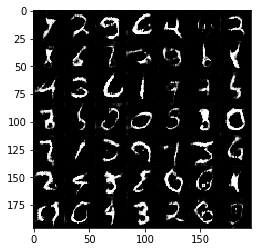

Epoch 2/2... Discriminator Loss: 1.9194... Generator Loss: 0.3421
Epoch 2/2... Discriminator Loss: 0.6690... Generator Loss: 1.8669
Epoch 2/2... Discriminator Loss: 1.5969... Generator Loss: 0.4328
Epoch 2/2... Discriminator Loss: 0.8385... Generator Loss: 1.3889
Epoch 2/2... Discriminator Loss: 1.0709... Generator Loss: 0.8159
Epoch 2/2... Discriminator Loss: 1.3489... Generator Loss: 0.6285
Epoch 2/2... Discriminator Loss: 1.0571... Generator Loss: 1.5674
Epoch 2/2... Discriminator Loss: 0.7868... Generator Loss: 1.5979
Epoch 2/2... Discriminator Loss: 0.8029... Generator Loss: 1.3346
Epoch 2/2... Discriminator Loss: 0.7909... Generator Loss: 1.2846


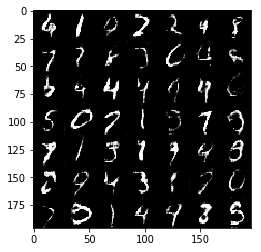

Epoch 2/2... Discriminator Loss: 1.1269... Generator Loss: 0.8229
Epoch 2/2... Discriminator Loss: 0.7415... Generator Loss: 1.3639
Epoch 2/2... Discriminator Loss: 0.7333... Generator Loss: 1.4591
Epoch 2/2... Discriminator Loss: 1.0095... Generator Loss: 1.0064
Epoch 2/2... Discriminator Loss: 1.7048... Generator Loss: 0.3496
Epoch 2/2... Discriminator Loss: 0.7839... Generator Loss: 2.0757
Epoch 2/2... Discriminator Loss: 0.7298... Generator Loss: 1.5108
Epoch 2/2... Discriminator Loss: 0.8129... Generator Loss: 1.2014
Epoch 2/2... Discriminator Loss: 0.6249... Generator Loss: 1.8955
Epoch 2/2... Discriminator Loss: 0.9157... Generator Loss: 2.2374


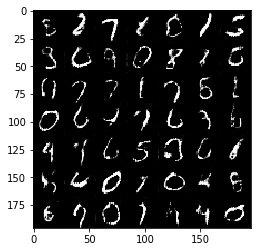

Epoch 2/2... Discriminator Loss: 0.6672... Generator Loss: 1.7869
Epoch 2/2... Discriminator Loss: 1.1448... Generator Loss: 0.7981
Epoch 2/2... Discriminator Loss: 1.0911... Generator Loss: 0.9131
Epoch 2/2... Discriminator Loss: 0.7056... Generator Loss: 1.3757
Epoch 2/2... Discriminator Loss: 0.7502... Generator Loss: 1.7615
Epoch 2/2... Discriminator Loss: 1.2997... Generator Loss: 0.7032
Epoch 2/2... Discriminator Loss: 1.0584... Generator Loss: 0.9269
Epoch 2/2... Discriminator Loss: 0.7560... Generator Loss: 2.6932
Epoch 2/2... Discriminator Loss: 1.4035... Generator Loss: 0.5981
Epoch 2/2... Discriminator Loss: 0.8636... Generator Loss: 1.6805


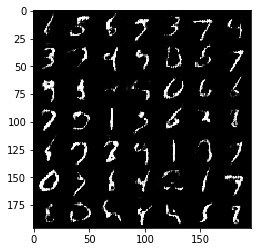

Epoch 2/2... Discriminator Loss: 0.8198... Generator Loss: 1.3696
Epoch 2/2... Discriminator Loss: 0.7952... Generator Loss: 1.4300
Epoch 2/2... Discriminator Loss: 0.6707... Generator Loss: 2.1158
Epoch 2/2... Discriminator Loss: 0.7378... Generator Loss: 1.4448
Epoch 2/2... Discriminator Loss: 0.9199... Generator Loss: 1.1927
Epoch 2/2... Discriminator Loss: 0.8482... Generator Loss: 1.0638
Epoch 2/2... Discriminator Loss: 1.2181... Generator Loss: 2.1489
Epoch 2/2... Discriminator Loss: 0.7457... Generator Loss: 1.5964
Epoch 2/2... Discriminator Loss: 0.9667... Generator Loss: 0.9692
Epoch 2/2... Discriminator Loss: 1.6154... Generator Loss: 0.4720


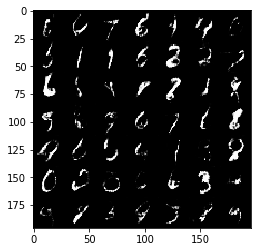

Epoch 2/2... Discriminator Loss: 0.6674... Generator Loss: 1.7294
Epoch 2/2... Discriminator Loss: 0.9941... Generator Loss: 0.8793
Epoch 2/2... Discriminator Loss: 0.6225... Generator Loss: 2.0518
Epoch 2/2... Discriminator Loss: 0.7605... Generator Loss: 1.6224
Epoch 2/2... Discriminator Loss: 0.7249... Generator Loss: 2.0614
Epoch 2/2... Discriminator Loss: 1.2844... Generator Loss: 0.7068
Epoch 2/2... Discriminator Loss: 0.9439... Generator Loss: 3.0412
Epoch 2/2... Discriminator Loss: 0.7832... Generator Loss: 1.7197
Epoch 2/2... Discriminator Loss: 0.7732... Generator Loss: 1.5905
Epoch 2/2... Discriminator Loss: 1.0241... Generator Loss: 1.0115


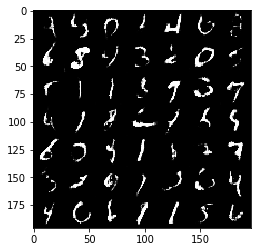

Epoch 2/2... Discriminator Loss: 1.1270... Generator Loss: 0.8191
Epoch 2/2... Discriminator Loss: 0.8767... Generator Loss: 2.2928
Epoch 2/2... Discriminator Loss: 0.7693... Generator Loss: 1.4805
Epoch 2/2... Discriminator Loss: 1.1982... Generator Loss: 0.7514
Epoch 2/2... Discriminator Loss: 0.7613... Generator Loss: 1.4132
Epoch 2/2... Discriminator Loss: 0.7360... Generator Loss: 1.5030
Epoch 2/2... Discriminator Loss: 0.6029... Generator Loss: 1.8396
Epoch 2/2... Discriminator Loss: 1.0892... Generator Loss: 1.1102
Epoch 2/2... Discriminator Loss: 1.5650... Generator Loss: 0.5324
Epoch 2/2... Discriminator Loss: 0.6298... Generator Loss: 1.7464


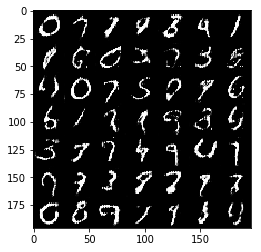

Epoch 2/2... Discriminator Loss: 0.6159... Generator Loss: 1.6820
Epoch 2/2... Discriminator Loss: 0.9565... Generator Loss: 1.0675
Epoch 2/2... Discriminator Loss: 0.7232... Generator Loss: 1.8956
Epoch 2/2... Discriminator Loss: 1.0880... Generator Loss: 0.8719
Epoch 2/2... Discriminator Loss: 0.8609... Generator Loss: 1.4240
Epoch 2/2... Discriminator Loss: 1.0582... Generator Loss: 0.7806
Epoch 2/2... Discriminator Loss: 0.7836... Generator Loss: 2.0815
Epoch 2/2... Discriminator Loss: 0.9571... Generator Loss: 1.1635
Epoch 2/2... Discriminator Loss: 0.8481... Generator Loss: 2.3913
Epoch 2/2... Discriminator Loss: 0.8977... Generator Loss: 1.1233


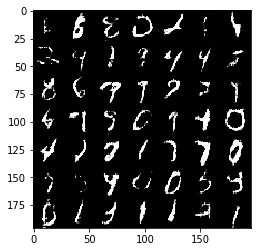

Epoch 2/2... Discriminator Loss: 1.7495... Generator Loss: 0.4650
Epoch 2/2... Discriminator Loss: 1.3071... Generator Loss: 0.7026
Epoch 2/2... Discriminator Loss: 1.2717... Generator Loss: 0.7024
Epoch 2/2... Discriminator Loss: 0.9222... Generator Loss: 1.8316
Epoch 2/2... Discriminator Loss: 0.8190... Generator Loss: 1.2159
Epoch 2/2... Discriminator Loss: 0.7718... Generator Loss: 1.3482
Epoch 2/2... Discriminator Loss: 1.7148... Generator Loss: 0.4156
Epoch 2/2... Discriminator Loss: 1.0981... Generator Loss: 1.8833
Epoch 2/2... Discriminator Loss: 1.1446... Generator Loss: 0.7635
Epoch 2/2... Discriminator Loss: 0.8143... Generator Loss: 1.2382


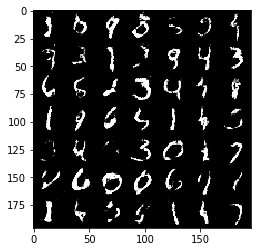

Epoch 2/2... Discriminator Loss: 0.7777... Generator Loss: 1.2588
Epoch 2/2... Discriminator Loss: 0.5370... Generator Loss: 2.4441
Epoch 2/2... Discriminator Loss: 0.6841... Generator Loss: 2.2378
Epoch 2/2... Discriminator Loss: 0.7085... Generator Loss: 1.6537
Epoch 2/2... Discriminator Loss: 1.0974... Generator Loss: 0.8101
Epoch 2/2... Discriminator Loss: 0.5030... Generator Loss: 2.5336
Epoch 2/2... Discriminator Loss: 2.1387... Generator Loss: 0.2569
Epoch 2/2... Discriminator Loss: 1.0229... Generator Loss: 0.9887
Epoch 2/2... Discriminator Loss: 0.9331... Generator Loss: 1.3047
Epoch 2/2... Discriminator Loss: 0.9105... Generator Loss: 1.0908


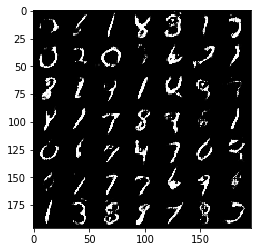

Epoch 2/2... Discriminator Loss: 1.2442... Generator Loss: 0.6898
Epoch 2/2... Discriminator Loss: 0.8446... Generator Loss: 1.2544
Epoch 2/2... Discriminator Loss: 0.9024... Generator Loss: 1.0323
Epoch 2/2... Discriminator Loss: 0.9792... Generator Loss: 0.9968
Epoch 2/2... Discriminator Loss: 0.7432... Generator Loss: 1.5184
Epoch 2/2... Discriminator Loss: 0.8692... Generator Loss: 1.7609
Epoch 2/2... Discriminator Loss: 0.8050... Generator Loss: 1.2644
Epoch 2/2... Discriminator Loss: 0.6608... Generator Loss: 1.5603
Epoch 2/2... Discriminator Loss: 0.8534... Generator Loss: 2.0844
Epoch 2/2... Discriminator Loss: 0.6243... Generator Loss: 1.7508


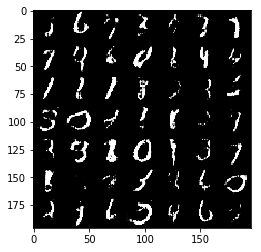

Epoch 2/2... Discriminator Loss: 2.2596... Generator Loss: 0.2710
Epoch 2/2... Discriminator Loss: 0.7278... Generator Loss: 1.4543
Epoch 2/2... Discriminator Loss: 1.3140... Generator Loss: 0.5725
Epoch 2/2... Discriminator Loss: 0.6937... Generator Loss: 1.6519
Epoch 2/2... Discriminator Loss: 0.6510... Generator Loss: 1.4737
Epoch 2/2... Discriminator Loss: 0.7429... Generator Loss: 1.7453
Epoch 2/2... Discriminator Loss: 1.5818... Generator Loss: 0.5231
Epoch 2/2... Discriminator Loss: 1.0213... Generator Loss: 1.0029
Epoch 2/2... Discriminator Loss: 1.8449... Generator Loss: 0.5628
Epoch 2/2... Discriminator Loss: 1.5192... Generator Loss: 3.3814


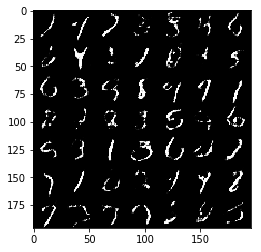

Epoch 2/2... Discriminator Loss: 0.6269... Generator Loss: 1.9279
Epoch 2/2... Discriminator Loss: 1.2315... Generator Loss: 0.7006
Epoch 2/2... Discriminator Loss: 0.7283... Generator Loss: 1.4389
Epoch 2/2... Discriminator Loss: 1.7860... Generator Loss: 0.3982
Epoch 2/2... Discriminator Loss: 0.6808... Generator Loss: 1.6216
Epoch 2/2... Discriminator Loss: 1.1541... Generator Loss: 0.7726
Epoch 2/2... Discriminator Loss: 0.9386... Generator Loss: 0.9816
Epoch 2/2... Discriminator Loss: 0.8241... Generator Loss: 1.3099
Epoch 2/2... Discriminator Loss: 1.1826... Generator Loss: 0.6759
Epoch 2/2... Discriminator Loss: 0.9110... Generator Loss: 1.0934


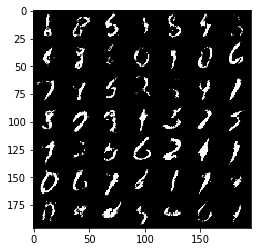

Epoch 2/2... Discriminator Loss: 0.7452... Generator Loss: 2.2298
Epoch 2/2... Discriminator Loss: 1.0282... Generator Loss: 1.0053
Epoch 2/2... Discriminator Loss: 0.8923... Generator Loss: 1.1180
Epoch 2/2... Discriminator Loss: 1.0042... Generator Loss: 0.9348
Epoch 2/2... Discriminator Loss: 1.2023... Generator Loss: 0.6602


In [12]:
batch_size = 32
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.8622... Generator Loss: 9.5282
Epoch 1/1... Discriminator Loss: 0.6737... Generator Loss: 3.9099
Epoch 1/1... Discriminator Loss: 1.9027... Generator Loss: 14.2908
Epoch 1/1... Discriminator Loss: 0.6104... Generator Loss: 3.0414
Epoch 1/1... Discriminator Loss: 1.3975... Generator Loss: 0.6575
Epoch 1/1... Discriminator Loss: 0.4809... Generator Loss: 3.7558
Epoch 1/1... Discriminator Loss: 0.4480... Generator Loss: 4.6013
Epoch 1/1... Discriminator Loss: 3.8941... Generator Loss: 7.2753
Epoch 1/1... Discriminator Loss: 3.3890... Generator Loss: 0.3094
Epoch 1/1... Discriminator Loss: 0.9336... Generator Loss: 2.0016


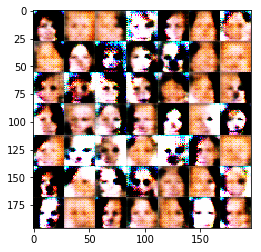

Epoch 1/1... Discriminator Loss: 1.5252... Generator Loss: 2.0941
Epoch 1/1... Discriminator Loss: 3.3028... Generator Loss: 4.9957
Epoch 1/1... Discriminator Loss: 1.1540... Generator Loss: 1.4879
Epoch 1/1... Discriminator Loss: 1.5813... Generator Loss: 1.4032
Epoch 1/1... Discriminator Loss: 2.4478... Generator Loss: 3.2374
Epoch 1/1... Discriminator Loss: 1.3733... Generator Loss: 0.6737
Epoch 1/1... Discriminator Loss: 1.5950... Generator Loss: 0.4161
Epoch 1/1... Discriminator Loss: 1.4286... Generator Loss: 0.8090
Epoch 1/1... Discriminator Loss: 1.4132... Generator Loss: 1.0862
Epoch 1/1... Discriminator Loss: 1.2288... Generator Loss: 0.9144


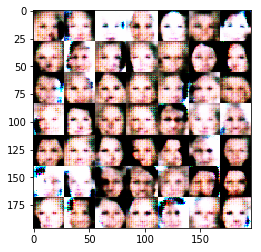

Epoch 1/1... Discriminator Loss: 1.3704... Generator Loss: 1.5551
Epoch 1/1... Discriminator Loss: 1.2351... Generator Loss: 0.9575
Epoch 1/1... Discriminator Loss: 1.2390... Generator Loss: 0.9552
Epoch 1/1... Discriminator Loss: 1.4750... Generator Loss: 0.9890
Epoch 1/1... Discriminator Loss: 1.3599... Generator Loss: 1.1341
Epoch 1/1... Discriminator Loss: 1.4902... Generator Loss: 1.0589
Epoch 1/1... Discriminator Loss: 1.3584... Generator Loss: 0.6220
Epoch 1/1... Discriminator Loss: 1.6968... Generator Loss: 2.0508
Epoch 1/1... Discriminator Loss: 1.7630... Generator Loss: 0.4234
Epoch 1/1... Discriminator Loss: 0.8246... Generator Loss: 2.3142


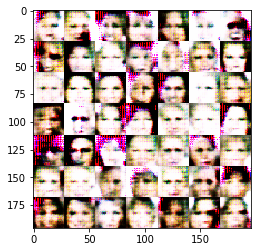

Epoch 1/1... Discriminator Loss: 1.3420... Generator Loss: 1.9292
Epoch 1/1... Discriminator Loss: 1.7905... Generator Loss: 1.9352
Epoch 1/1... Discriminator Loss: 1.1361... Generator Loss: 1.0791
Epoch 1/1... Discriminator Loss: 1.3218... Generator Loss: 0.8251
Epoch 1/1... Discriminator Loss: 1.1373... Generator Loss: 1.0824
Epoch 1/1... Discriminator Loss: 1.1899... Generator Loss: 0.9532
Epoch 1/1... Discriminator Loss: 0.8349... Generator Loss: 1.0568
Epoch 1/1... Discriminator Loss: 1.2682... Generator Loss: 1.4718
Epoch 1/1... Discriminator Loss: 1.1214... Generator Loss: 1.0934
Epoch 1/1... Discriminator Loss: 2.4078... Generator Loss: 3.2868


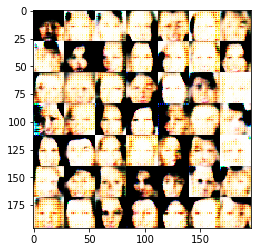

Epoch 1/1... Discriminator Loss: 4.7179... Generator Loss: 5.1641
Epoch 1/1... Discriminator Loss: 1.3152... Generator Loss: 0.8664
Epoch 1/1... Discriminator Loss: 1.2820... Generator Loss: 0.9766
Epoch 1/1... Discriminator Loss: 1.2968... Generator Loss: 0.8911
Epoch 1/1... Discriminator Loss: 1.2554... Generator Loss: 0.9354
Epoch 1/1... Discriminator Loss: 1.2053... Generator Loss: 0.8202
Epoch 1/1... Discriminator Loss: 1.0645... Generator Loss: 2.3781
Epoch 1/1... Discriminator Loss: 1.0783... Generator Loss: 1.3486
Epoch 1/1... Discriminator Loss: 1.5535... Generator Loss: 0.8720
Epoch 1/1... Discriminator Loss: 1.2338... Generator Loss: 1.0550


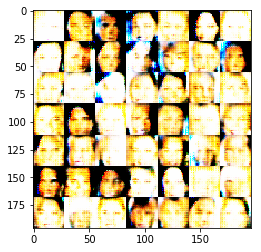

Epoch 1/1... Discriminator Loss: 1.2230... Generator Loss: 1.2403
Epoch 1/1... Discriminator Loss: 1.5323... Generator Loss: 0.4149
Epoch 1/1... Discriminator Loss: 0.9507... Generator Loss: 0.9740
Epoch 1/1... Discriminator Loss: 1.0809... Generator Loss: 1.1040
Epoch 1/1... Discriminator Loss: 1.1190... Generator Loss: 1.3308
Epoch 1/1... Discriminator Loss: 1.2130... Generator Loss: 0.7584
Epoch 1/1... Discriminator Loss: 1.6557... Generator Loss: 0.3813
Epoch 1/1... Discriminator Loss: 1.0759... Generator Loss: 0.9638
Epoch 1/1... Discriminator Loss: 1.5874... Generator Loss: 2.3973
Epoch 1/1... Discriminator Loss: 0.9582... Generator Loss: 1.2976


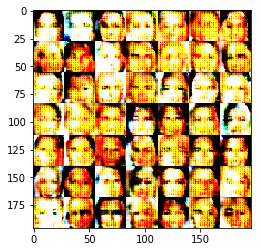

Epoch 1/1... Discriminator Loss: 1.5769... Generator Loss: 0.5501
Epoch 1/1... Discriminator Loss: 1.1214... Generator Loss: 0.9895
Epoch 1/1... Discriminator Loss: 1.3747... Generator Loss: 0.7681
Epoch 1/1... Discriminator Loss: 1.3698... Generator Loss: 1.0633
Epoch 1/1... Discriminator Loss: 1.1818... Generator Loss: 0.9965
Epoch 1/1... Discriminator Loss: 1.4725... Generator Loss: 0.7705
Epoch 1/1... Discriminator Loss: 1.4862... Generator Loss: 0.9264
Epoch 1/1... Discriminator Loss: 1.3217... Generator Loss: 0.6897
Epoch 1/1... Discriminator Loss: 2.6850... Generator Loss: 2.9536
Epoch 1/1... Discriminator Loss: 1.1713... Generator Loss: 0.7869


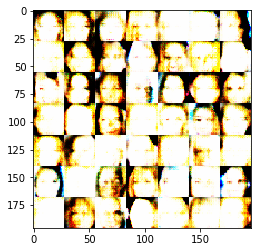

Epoch 1/1... Discriminator Loss: 0.5655... Generator Loss: 1.9398
Epoch 1/1... Discriminator Loss: 1.0871... Generator Loss: 2.4330
Epoch 1/1... Discriminator Loss: 3.9798... Generator Loss: 3.4290
Epoch 1/1... Discriminator Loss: 1.3752... Generator Loss: 0.6991
Epoch 1/1... Discriminator Loss: 1.2454... Generator Loss: 0.9256
Epoch 1/1... Discriminator Loss: 1.2246... Generator Loss: 1.0717
Epoch 1/1... Discriminator Loss: 1.2949... Generator Loss: 1.1732
Epoch 1/1... Discriminator Loss: 1.3158... Generator Loss: 0.6178
Epoch 1/1... Discriminator Loss: 1.0831... Generator Loss: 1.1190
Epoch 1/1... Discriminator Loss: 1.6165... Generator Loss: 0.3660


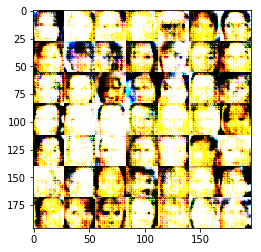

Epoch 1/1... Discriminator Loss: 1.0725... Generator Loss: 0.7982
Epoch 1/1... Discriminator Loss: 1.3249... Generator Loss: 1.0413
Epoch 1/1... Discriminator Loss: 1.1715... Generator Loss: 1.3247
Epoch 1/1... Discriminator Loss: 1.3401... Generator Loss: 0.8934
Epoch 1/1... Discriminator Loss: 1.3694... Generator Loss: 1.0748
Epoch 1/1... Discriminator Loss: 1.1060... Generator Loss: 0.9951
Epoch 1/1... Discriminator Loss: 1.5480... Generator Loss: 1.5900
Epoch 1/1... Discriminator Loss: 1.3738... Generator Loss: 0.8526
Epoch 1/1... Discriminator Loss: 1.1544... Generator Loss: 1.4920
Epoch 1/1... Discriminator Loss: 1.4878... Generator Loss: 0.5293


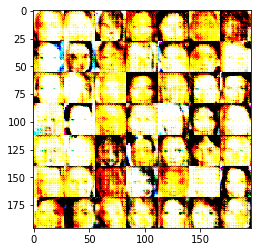

Epoch 1/1... Discriminator Loss: 1.1984... Generator Loss: 0.8493
Epoch 1/1... Discriminator Loss: 1.0587... Generator Loss: 1.4036
Epoch 1/1... Discriminator Loss: 1.0935... Generator Loss: 1.5408
Epoch 1/1... Discriminator Loss: 1.3966... Generator Loss: 1.1223
Epoch 1/1... Discriminator Loss: 1.6074... Generator Loss: 0.3824
Epoch 1/1... Discriminator Loss: 1.3820... Generator Loss: 0.7536
Epoch 1/1... Discriminator Loss: 1.2948... Generator Loss: 0.8510
Epoch 1/1... Discriminator Loss: 1.2053... Generator Loss: 0.6800
Epoch 1/1... Discriminator Loss: 1.2137... Generator Loss: 0.7871
Epoch 1/1... Discriminator Loss: 1.4293... Generator Loss: 0.7312


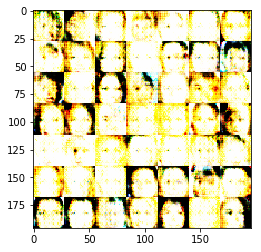

Epoch 1/1... Discriminator Loss: 0.8954... Generator Loss: 1.6072
Epoch 1/1... Discriminator Loss: 1.2008... Generator Loss: 0.7859
Epoch 1/1... Discriminator Loss: 1.4591... Generator Loss: 0.5628
Epoch 1/1... Discriminator Loss: 1.3516... Generator Loss: 0.9058
Epoch 1/1... Discriminator Loss: 1.2025... Generator Loss: 0.7964
Epoch 1/1... Discriminator Loss: 1.3067... Generator Loss: 0.9138
Epoch 1/1... Discriminator Loss: 1.3306... Generator Loss: 0.6736
Epoch 1/1... Discriminator Loss: 1.2979... Generator Loss: 0.8593
Epoch 1/1... Discriminator Loss: 1.3900... Generator Loss: 0.7007
Epoch 1/1... Discriminator Loss: 1.2587... Generator Loss: 0.8131


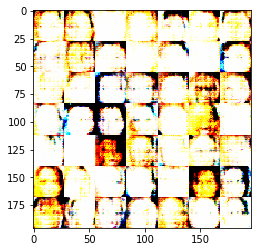

Epoch 1/1... Discriminator Loss: 1.3860... Generator Loss: 0.5831
Epoch 1/1... Discriminator Loss: 1.8192... Generator Loss: 0.3121
Epoch 1/1... Discriminator Loss: 1.3392... Generator Loss: 0.9086
Epoch 1/1... Discriminator Loss: 1.3553... Generator Loss: 0.9100
Epoch 1/1... Discriminator Loss: 1.1898... Generator Loss: 0.6527
Epoch 1/1... Discriminator Loss: 1.4705... Generator Loss: 2.3758
Epoch 1/1... Discriminator Loss: 1.3016... Generator Loss: 1.0363
Epoch 1/1... Discriminator Loss: 1.2374... Generator Loss: 0.7476
Epoch 1/1... Discriminator Loss: 1.4908... Generator Loss: 1.0239
Epoch 1/1... Discriminator Loss: 1.5755... Generator Loss: 1.3687


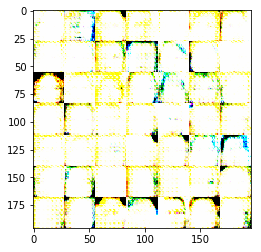

Epoch 1/1... Discriminator Loss: 1.1465... Generator Loss: 0.7924
Epoch 1/1... Discriminator Loss: 1.4086... Generator Loss: 0.6743
Epoch 1/1... Discriminator Loss: 1.1430... Generator Loss: 0.8499
Epoch 1/1... Discriminator Loss: 1.3209... Generator Loss: 1.4618
Epoch 1/1... Discriminator Loss: 1.2006... Generator Loss: 0.8955
Epoch 1/1... Discriminator Loss: 1.5743... Generator Loss: 0.5117
Epoch 1/1... Discriminator Loss: 1.4678... Generator Loss: 1.0100
Epoch 1/1... Discriminator Loss: 1.3195... Generator Loss: 0.6813
Epoch 1/1... Discriminator Loss: 1.2753... Generator Loss: 0.9185
Epoch 1/1... Discriminator Loss: 1.0821... Generator Loss: 0.9454


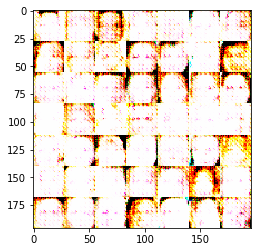

Epoch 1/1... Discriminator Loss: 1.3530... Generator Loss: 0.8326
Epoch 1/1... Discriminator Loss: 1.3880... Generator Loss: 0.7010
Epoch 1/1... Discriminator Loss: 1.5155... Generator Loss: 1.5252
Epoch 1/1... Discriminator Loss: 1.2196... Generator Loss: 0.9272
Epoch 1/1... Discriminator Loss: 1.3301... Generator Loss: 0.8794
Epoch 1/1... Discriminator Loss: 1.1928... Generator Loss: 0.9670
Epoch 1/1... Discriminator Loss: 1.4180... Generator Loss: 1.5102
Epoch 1/1... Discriminator Loss: 1.3965... Generator Loss: 0.6200
Epoch 1/1... Discriminator Loss: 1.1285... Generator Loss: 1.5730
Epoch 1/1... Discriminator Loss: 1.7056... Generator Loss: 1.9653


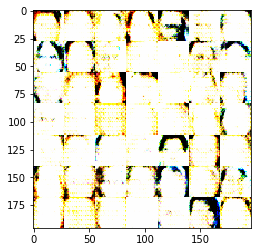

Epoch 1/1... Discriminator Loss: 1.3966... Generator Loss: 0.5324
Epoch 1/1... Discriminator Loss: 1.4120... Generator Loss: 0.7145
Epoch 1/1... Discriminator Loss: 1.2540... Generator Loss: 1.0395
Epoch 1/1... Discriminator Loss: 1.6051... Generator Loss: 1.7108
Epoch 1/1... Discriminator Loss: 1.6438... Generator Loss: 0.4474
Epoch 1/1... Discriminator Loss: 1.3085... Generator Loss: 1.1734
Epoch 1/1... Discriminator Loss: 1.2773... Generator Loss: 0.9618
Epoch 1/1... Discriminator Loss: 1.4498... Generator Loss: 0.8486
Epoch 1/1... Discriminator Loss: 1.2074... Generator Loss: 1.2180
Epoch 1/1... Discriminator Loss: 1.4986... Generator Loss: 0.5385


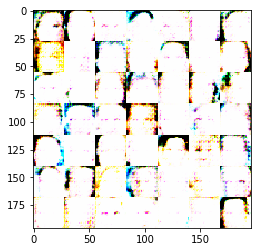

Epoch 1/1... Discriminator Loss: 1.2614... Generator Loss: 1.0836
Epoch 1/1... Discriminator Loss: 1.4177... Generator Loss: 1.0550
Epoch 1/1... Discriminator Loss: 1.2577... Generator Loss: 0.8925
Epoch 1/1... Discriminator Loss: 1.4585... Generator Loss: 0.6973
Epoch 1/1... Discriminator Loss: 1.3421... Generator Loss: 0.7092


KeyboardInterrupt: 

In [13]:
batch_size = 64
z_dim = 100
learning_rate = 0.002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.